In [59]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [60]:
# 현재경로 확인
os.getcwd()

'/Users/david_king/Desktop/Everything/11_Git/ML_code/01_회귀분석'

In [61]:
# 데이터 불러오기
ploan = pd.read_csv("../00_Data/Personal Loan.csv")
"""
Experience 경력
Income 수입
Famliy 가족단위
CCAvg 월 카드사용량 
Education 교육수준 (1: undergrad; 2, Graduate; 3; Advance )
Mortgage 가계대출
Securities account 유가증권계좌유무
CD account 양도예금증서 계좌 유무
Online 온라인계좌유무
CreidtCard 신용카드유무 
"""
display(ploan.head())

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [62]:
# 의미없는 변수 제거
ploan_processed = ploan.dropna().drop(['ID', 'ZIP Code'], axis=1, inplace = False)

# 데이터 선택
feature_columns = list(ploan_processed.columns.difference(['Personal Loan']))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부: 1 or 0

train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 11) (750, 11) (1750,) (750,)


# Lasso & Ridge

In [63]:
ll = Lasso(alpha=0.01)
ll.fit(train_x, train_y)

Lasso(alpha=0.01)

In [64]:
ll.coef_

array([ 0.00000000e+00,  2.04783983e-03,  1.14390390e-01, -0.00000000e+00,
        6.58342418e-02,  4.76625359e-04,  3.13396711e-02,  3.55393865e-03,
        1.31719530e-05,  0.00000000e+00, -0.00000000e+00])

In [65]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                  0.6019
Time:                        16:15:35   Log-Likelihood:                -229.98
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                5.481e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0363      0.098      0.369      0.712      -0.156       0.229
CCAvg                  0.0955      0.065      1.479      0.139      -0.031       0.222
CD Account             3.9098      0.554      7.056      0.000       2.824       4.996
CreditCard            -1.1032      0.343     -3.215      0.001      -1.776      -0.431
Education              1.6276      0.192      8.479      0.000       1.251       2.004
Experience            -0.0179      0.098     -0.184      0.854      -0.209       0.173
Family                 0.7356      0.126      5.828      0.000       0.488       0.983
Income                 0.0526      0.004     12.507      0.000       0.044       0.061
Mortgage              -0.0002      0.001     -0.264      0.792      -0.002       0.002
Online                -0.4549      0.259     -1.753      0.080      -0.963       0.054
Securities Account    -1.3229      0.529     -2.502      0.012      -2.359      -0.287
const                -14.2217      2.704     -5.259      0.000     -19.521      -8.922
======================================================================================
"""

In [66]:
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat) ## accuracy
    return(acc)

In [67]:
# Lasso
pred_y_lasso = ll.predict(test_x) # full model
pred_y_lasso = cut_off(pred_y_lasso, 0.5)
cfmat = confusion_matrix(test_y, pred_y_lasso)
print(acc(cfmat))

0.936


In [68]:
cfmat

array([[672,   1],
       [ 47,  30]])

AUC: 0.6940622527546747


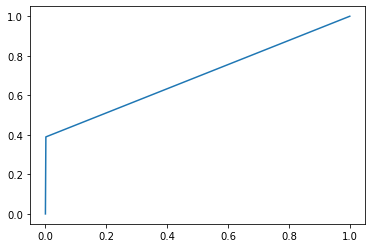

In [69]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_lasso, pos_label=1)

# ROC curve
plt.plot(fpr, tpr)

# AUC
auc = np.trapz(tpr, fpr)

print("AUC:", auc)

In [53]:
# Ridge
rr = Ridge(alpha=0.01)
rr.fit(train_x, train_y)

Ridge(alpha=0.01)

In [54]:
rr.coef_

array([-3.71283678e-03,  7.37570775e-03,  3.54973975e-01, -5.28579506e-02,
        7.83404224e-02,  4.12823466e-03,  3.62504712e-02,  3.27385112e-03,
        1.73105480e-06, -1.91297381e-02, -8.77388670e-02])

In [55]:
ll.coef_

array([ 0.00000000e+00,  2.04783983e-03,  1.14390390e-01, -0.00000000e+00,
        6.58342418e-02,  4.76625359e-04,  3.13396711e-02,  3.55393865e-03,
        1.31719530e-05,  0.00000000e+00, -0.00000000e+00])

In [56]:
pred_y_ridge = rr.predict(test_x) # full model
pred_y_ridge = cut_off(pred_y_ridge, 0.5)
cfmat = confusion_matrix(test_y, pred_y_ridge)
print(acc(cfmat))

0.932


AUC: 0.6918334266031145


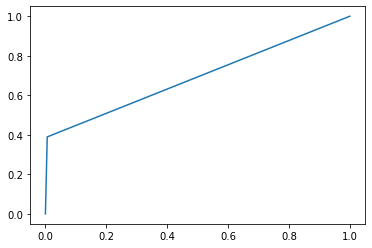

In [57]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_ridge, pos_label=1)

# ROC curve
plt.plot(fpr, tpr)

# AUC
auc = np.trapz(tpr, fpr)

print("AUC:", auc)

In [74]:
alpha = np.logspace(-3, 1, 5)
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [75]:
data = []
acc_table = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(train_x, train_y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))
    
    pred_y = lasso.predict(test_x)
    pred_y = cut_off(pred_y, 0.5)
    cfmat = confusion_matrix(test_y, pred_y)
    acc_table.append((acc(cfmat)))
    
df_lasso = pd.DataFrame(data, index=alpha).T
acc_table_lasso = pd.DataFrame(acc_table, index=alpha).T

In [77]:
display(df_lasso)
display(acc_table_lasso)

,0.001,0.010,0.100,1.000,10.000
0,-0.335006,-0.381869,-0.143698,-0.113103,0.102286
1,-0.002109,0.000000,0.000000,0.000000,-0.000000
2,0.006829,0.002048,0.000000,0.000000,0.000000
3,0.322174,0.114390,0.000000,0.000000,0.000000
4,-0.043385,-0.000000,-0.000000,-0.000000,-0.000000
5,0.076771,0.065834,0.000000,0.000000,0.000000
6,0.002534,0.000477,0.000000,0.000000,-0.000000
7,0.035728,0.031340,0.000000,0.000000,0.000000
8,0.003313,0.003554,0.003291,0.002893,0.000000
9,0.000004,0.000013,0.000016,0.000000,0.000000


,0.001,0.010,0.100,1.000,10.000
0,0.932,0.936,0.894667,0.897333,0.897333


In [78]:
data = []
acc_table = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(train_x, train_y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))
    
    pred_y = ridge.predict(test_x)
    pred_y = cut_off(pred_y, 0.5)
    cfmat = confusion_matrix(test_y, pred_y)
    acc_table.append((acc(cfmat)))
    
df_ridge = pd.DataFrame(data, index=alpha).T
acc_table_ridge = pd.DataFrame(acc_table, index=alpha).T

In [79]:
display(df_ridge)
display(acc_table_ridge)

,0.001,0.010,0.100,1.000,10.000
0,-0.289557,-0.289565,-0.289645,-0.290438,-0.297581
1,-0.003713,-0.003713,-0.003713,-0.003716,-0.003723
2,0.007376,0.007376,0.007376,0.007378,0.007388
3,0.355019,0.354974,0.354529,0.350141,0.311781
4,-0.052866,-0.052858,-0.052782,-0.052037,-0.045541
5,0.078340,0.078340,0.078341,0.078347,0.078316
6,0.004128,0.004128,0.004129,0.004136,0.004175
7,0.036250,0.036250,0.036254,0.036289,0.036578
8,0.003274,0.003274,0.003274,0.003278,0.003313
9,0.000002,0.000002,0.000002,0.000002,0.000004


,0.001,0.010,0.100,1.000,10.000
0,0.932,0.932,0.932,0.932,0.932


### 람다 값의 변화에 따른 회귀계수 축소 시각화

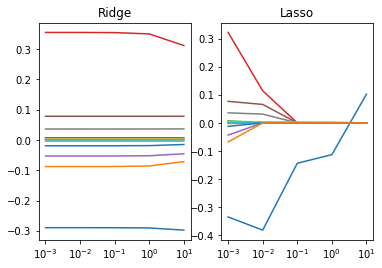

In [84]:
import matplotlib.pyplot as plt

ax1 = plt.subplot(1, 2, 1)
plt.semilogx(df_ridge.T)
plt.xticks(alpha)
plt.title('Ridge')

ax2 = plt.subplot(1, 2, 2)
plt.semilogx(df_lasso.T)
plt.xticks(alpha)
plt.title('Lasso')

plt.show()